<a href="https://colab.research.google.com/github/sana1410/Regression-Analysis/blob/main/Coronary_heart_risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Objective:**
The dataset provides the risk factors associated with heart disease for ~4200 patients and whether they have a risk of coronary heart disease in the next 10 years.
Based on the dataset provided:
1.	Create a segmentation of the patients based on the demographic, behavioural and health data and analyse the risk propensity of heart disease for each segment
2.	Predict the probability of a patient suffering a coronary heart disease in the next 10 years
3.	Identify the most important factors that influence heart disease
4.	Come up with recommendations for
a.	Preventing / reducing chances of getting a heart disease
b.	Extrapolated applications of the model you build and its findings


In [232]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_csv('/content/Coronary_heart_risk_study.csv')

In [233]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [234]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [235]:
data.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [236]:
data.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

Replace missing data using KNN imputation

In [237]:
from sklearn.impute import KNNImputer
knn= KNNImputer(n_neighbors=3)
data_imputed=pd.DataFrame(knn.fit_transform(data),columns=data.columns.to_list())

In [238]:
data_imputed.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0.0
1,0.0,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0.0
2,1.0,48.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.0,0.0
3,0.0,61.0,3.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.0,1.0
4,0.0,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.0,0.0


In [239]:
data_imputed.isna().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [240]:
data_imputed['education']=round(data_imputed['education'],0)

In [241]:
data_imputed['education'].value_counts()

1.0    1746
2.0    1306
3.0     713
4.0     475
Name: education, dtype: int64

In [242]:
data_imputed['BPMeds']=round(data_imputed['BPMeds'],0)

Change the Datatype

In [243]:
data_imputed['TenYearCHD']=data_imputed['TenYearCHD'].astype('str')
data_imputed['male']=data_imputed['male'].astype('str')
data_imputed['education']=data_imputed['education'].astype('str')
data_imputed['currentSmoker']=data_imputed['currentSmoker'].astype('str')
data_imputed['BPMeds']=data_imputed['BPMeds'].astype('str')
data_imputed['prevalentStroke']=data_imputed['prevalentStroke'].astype('str')
data_imputed['prevalentHyp']=data_imputed['prevalentHyp'].astype('str')
data_imputed['diabetes']=data_imputed['diabetes'].astype('str')
data_imputed['TenYearCHD']=data_imputed['TenYearCHD'].astype('str')

In [244]:
data_imputed.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0.0
1,0.0,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0.0
2,1.0,48.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.0,0.0
3,0.0,61.0,3.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.0,1.0
4,0.0,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.0,0.0


In [245]:
data_imputed['TenYearCHD']=data_imputed['TenYearCHD'].replace({'1.0':'Yes','0.0':'no'})
data_imputed['male']=data_imputed['male'].replace({'1.0':'male','0.0':'female'})
data_imputed['education']=data_imputed['education'].replace({'4.0':'primary','3.0':'secondary','2.0':'graduate','1.0':'post-graduate'})
data_imputed['currentSmoker']=data_imputed['currentSmoker'].replace({'1.0':'Yes','0.0':'No'})
data_imputed['BPMeds']=data_imputed['BPMeds'].replace({'1.0':'Yes','0.0':'No'})
data_imputed['prevalentStroke']=data_imputed['prevalentStroke'].replace({'1.0':'Yes','0.0':'No'})
data_imputed['prevalentHyp']=data_imputed['prevalentHyp'].replace({'1.0':'Yes','0.0':'No'})
data_imputed['diabetes']=data_imputed['diabetes'].replace({'1.0':'Yes','0.0':'No'})

In [246]:
data_imputed.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,male,39.0,primary,No,0.0,No,No,No,No,195.0,106.0,70.0,26.97,80.0,77.0,no
1,female,46.0,graduate,No,0.0,No,No,No,No,250.0,121.0,81.0,28.73,95.0,76.0,no
2,male,48.0,post-graduate,Yes,20.0,No,No,No,No,245.0,127.5,80.0,25.34,75.0,70.0,no
3,female,61.0,secondary,Yes,30.0,No,No,Yes,No,225.0,150.0,95.0,28.58,65.0,103.0,Yes
4,female,46.0,secondary,Yes,23.0,No,No,No,No,285.0,130.0,84.0,23.10,85.0,85.0,no


In [247]:
data_imputed['male'].value_counts()

female    2420
male      1820
Name: male, dtype: int64

In [248]:
data_imputed['education'].value_counts()

post-graduate    1746
graduate         1306
secondary         713
primary           475
Name: education, dtype: int64

In [249]:
data_imputed['currentSmoker'].value_counts()

No     2145
Yes    2095
Name: currentSmoker, dtype: int64

In [250]:
data_imputed['BPMeds'].value_counts()

No     4116
Yes     124
Name: BPMeds, dtype: int64

In [251]:
data_imputed['prevalentStroke'].value_counts()

No     4215
Yes      25
Name: prevalentStroke, dtype: int64

In [252]:
data_imputed['prevalentHyp'].value_counts()

No     2923
Yes    1317
Name: prevalentHyp, dtype: int64

In [253]:
data_imputed['diabetes'].value_counts()

No     4131
Yes     109
Name: diabetes, dtype: int64

In [254]:
data_imputed.describe()

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
count,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000
mean,49.580189,9.013443,236.690802,132.354599,82.897759,25.799615,75.879167,81.846698
std,8.572942,11.895361,44.382073,22.033300,11.910394,4.073315,12.023936,23.061472
min,32.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000
25%,42.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,72.000000
50%,49.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,78.000000
75%,56.000000,20.000000,263.000000,144.000000,90.000000,28.040000,83.000000,86.000000
max,70.000000,70.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000


In [255]:
data_imputed['TenYearCHD'].value_counts()

no     3596
Yes     644
Name: TenYearCHD, dtype: int64

Checking for outliers

<Axes: >

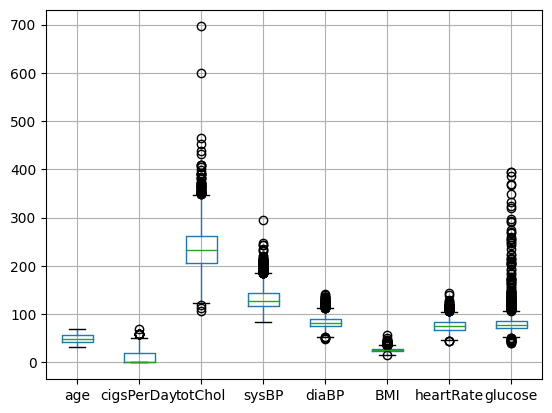

In [256]:
data_imputed[['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']].boxplot()

<Axes: xlabel='glucose', ylabel='Count'>

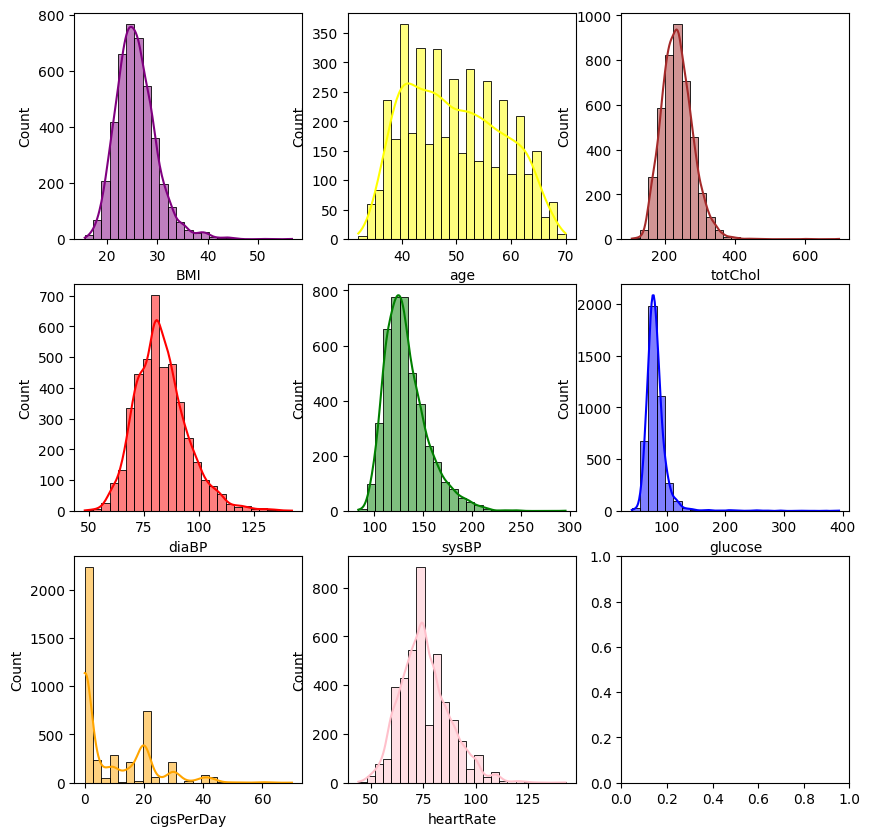

In [257]:
fig,axes =plt.subplots(nrows=3,ncols=3,figsize=(10,10))

sns.histplot(x=data_imputed['BMI'],bins=25,kde=True,ax=axes[0,0],color='purple')
sns.histplot(x=data_imputed['age'],bins=25,kde=True,ax=axes[0,1],color='yellow')
sns.histplot(x=data_imputed['sysBP'],bins=25,kde=True,ax=axes[1,1],color='green')
sns.histplot(x=data_imputed['diaBP'],bins=25,kde=True,ax=axes[1,0],color='red')
sns.histplot(x=data_imputed['cigsPerDay'],bins=25,kde=True,ax=axes[2,0],color='orange')
sns.histplot(x=data_imputed['heartRate'],bins=25,kde=True,ax=axes[2,1],color='pink')
sns.histplot(x=data_imputed['totChol'],bins=25,kde=True,ax=axes[0,2],color='brown')
sns.histplot(x=data_imputed['glucose'],bins=25,kde=True,ax=axes[1,2],color='blue')


Outlier Removal

In [258]:
def oulier_count(text):
  q3=np.quantile(data_imputed[text],0.75)
  q1=np.quantile(data_imputed[text],0.25)
  iqr=q3-q1
  x=0
  for i in range(len(data_imputed)):
      if data_imputed[text][i]>(q3+1.5*iqr) or data_imputed[text][i]<(q1-1.5*iqr)   :
        x=x+1
      else :
        data_imputed[text][i]
  return x

print(f'the columns BMI has ',oulier_count('BMI'),'number of ouliers')
print(f'the columns sysBP has ',oulier_count('sysBP'),'number of ouliers')
print(f'the columns diaBP has ',oulier_count('diaBP'),'number of ouliers')
print(f'the columns cigsPerDay has ',oulier_count('cigsPerDay'),'number of ouliers')
print(f'the columns heartRate has ',oulier_count('heartRate'),'number of ouliers')
print(f'the columns totChol has ',oulier_count('totChol'),'number of ouliers')
print(f'the columns glucose has ',oulier_count('glucose'),'number of ouliers')

the columns BMI has  97 number of ouliers
the columns sysBP has  126 number of ouliers
the columns diaBP has  77 number of ouliers
the columns cigsPerDay has  12 number of ouliers
the columns heartRate has  76 number of ouliers
the columns totChol has  56 number of ouliers
the columns glucose has  231 number of ouliers


In [259]:
def outlier_remove(text):
  q3=np.quantile(data_imputed[text],0.75)
  q1=np.quantile(data_imputed[text],0.25)
  iqr=q3-q1
  upper=np.quantile(data_imputed[text],0.95)
  lower=np.quantile(data_imputed[text],0.10)
  x=0
  for i in range(len(data_imputed)):
      if data_imputed[text][i]>(q3+1.5*iqr) :
        data_imputed[text][i]=upper
      else :
        data_imputed[text][i]
      if data_imputed[text][i]<(q1-1.5*iqr):
        data_imputed[text][i]=lower
      else :
        data_imputed[text][i]
  return data_imputed[text]

In [260]:
outlier_remove('sysBP')
outlier_remove('diaBP')
outlier_remove('cigsPerDay')
outlier_remove('heartRate')
outlier_remove('totChol')
outlier_remove('glucose')
print(f'the columns sysBP has ',oulier_count('sysBP'),'number of ouliers')
print(f'the columns diaBP has ',oulier_count('diaBP'),'number of ouliers')
print(f'the columns cigsPerDay has ',oulier_count('cigsPerDay'),'number of ouliers')
print(f'the columns heartRate has ',oulier_count('heartRate'),'number of ouliers')
print(f'the columns totChol has ',oulier_count('totChol'),'number of ouliers')
print(f'the columns glucose has ',oulier_count('glucose'),'number of ouliers')

<ipython-input-259-5e4810a54559>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_imputed[text][i]=upper
<ipython-input-259-5e4810a54559>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_imputed[text][i]=lower


the columns sysBP has  0 number of ouliers
the columns diaBP has  0 number of ouliers
the columns cigsPerDay has  0 number of ouliers
the columns heartRate has  0 number of ouliers
the columns totChol has  0 number of ouliers
the columns glucose has  215 number of ouliers


<Axes: >

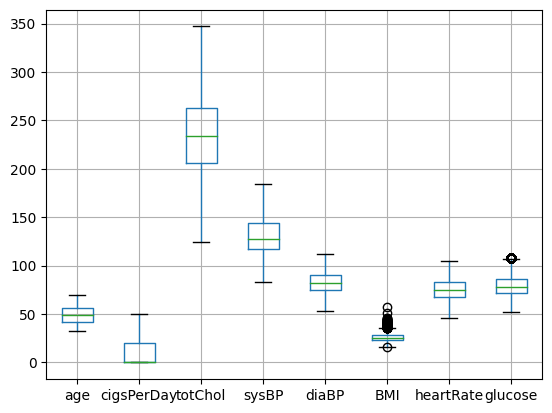

In [261]:
data_imputed[['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']].boxplot()

EDA

<Axes: xlabel='education', ylabel='count'>

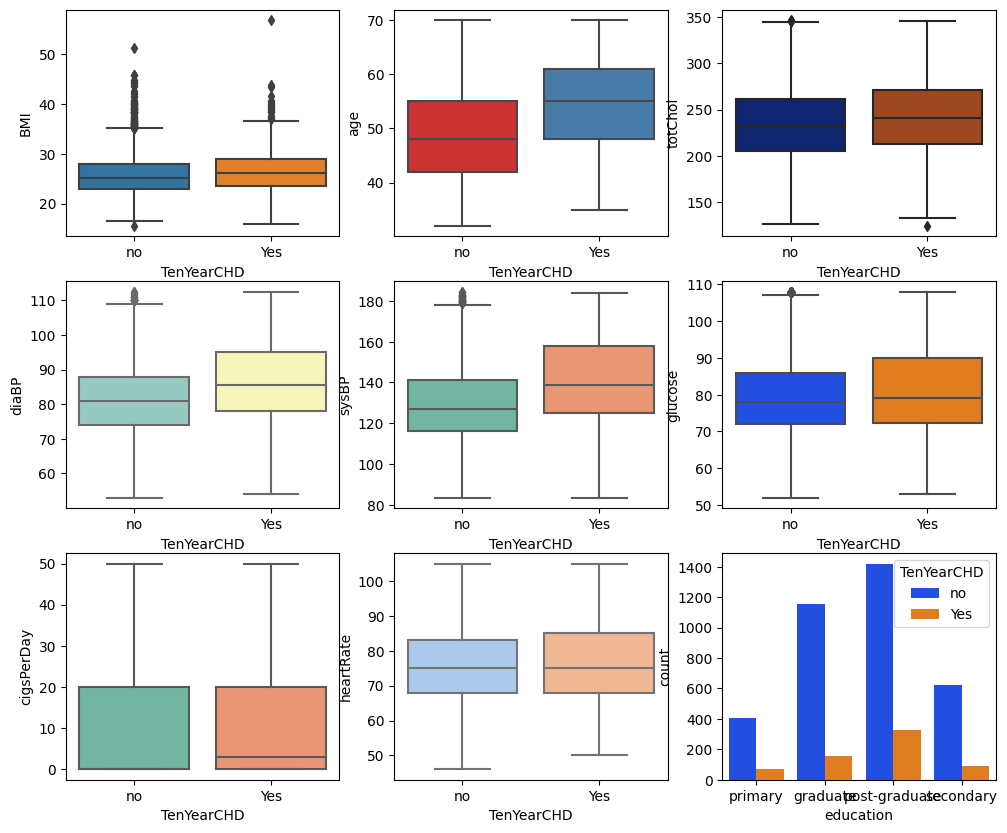

In [262]:
fig,axes =plt.subplots(nrows=3,ncols=3,figsize=(12,10))

sns.boxplot(y='BMI',x='TenYearCHD',data=data_imputed,ax=axes[0,0])
sns.boxplot(y='age',x='TenYearCHD',data=data_imputed,ax=axes[0,1],palette='Set1')
sns.boxplot(y='sysBP',x='TenYearCHD',data=data_imputed,ax=axes[1,1],palette='Set2')
sns.boxplot(y='diaBP',x='TenYearCHD',data=data_imputed,ax=axes[1,0],palette='Set3')
sns.boxplot(y='cigsPerDay',x='TenYearCHD',data=data_imputed,ax=axes[2,0],palette='Set2')
sns.boxplot(y='heartRate',x='TenYearCHD',data=data_imputed,ax=axes[2,1],palette='pastel')
sns.boxplot(y='totChol',x='TenYearCHD',data=data_imputed,ax=axes[0,2],palette='dark')
sns.boxplot(y='glucose',x='TenYearCHD',data=data_imputed,ax=axes[1,2],palette='bright')
sns.countplot(x='education',data=data_imputed,ax=axes[2,2],palette='bright',hue='TenYearCHD')



<Axes: xlabel='TenYearCHD', ylabel='age'>

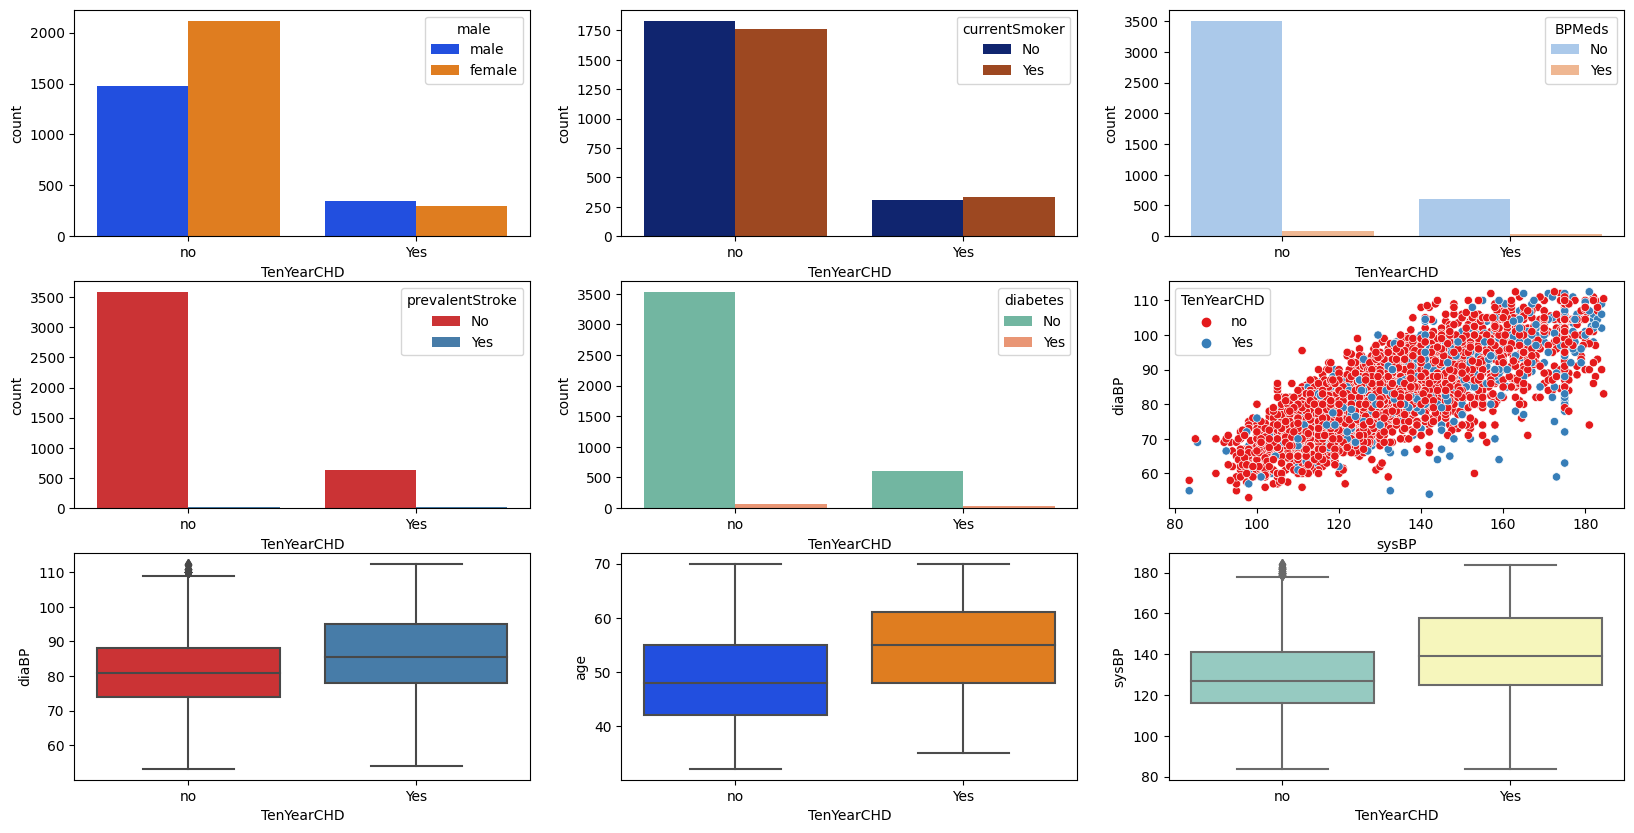

In [263]:
fig,axes =plt.subplots(nrows=3,ncols=3,figsize=(20,10))

sns.countplot(x='TenYearCHD',data=data_imputed,ax=axes[0,0],palette='bright',hue='male')
sns.countplot(x='TenYearCHD',data=data_imputed,ax=axes[0,1],palette='dark',hue='currentSmoker')
sns.countplot(x='TenYearCHD',data=data_imputed,ax=axes[0,2],palette='pastel',hue='BPMeds')
sns.countplot(x='TenYearCHD',data=data_imputed,ax=axes[1,0],palette='Set1',hue='prevalentStroke')
sns.countplot(x='TenYearCHD',data=data_imputed,ax=axes[1,1],palette='Set2',hue='diabetes')
sns.scatterplot(x='sysBP',y='diaBP',data=data_imputed,ax=axes[1,2],palette='Set1',hue='TenYearCHD')
sns.boxplot(y='sysBP',x='TenYearCHD',data=data_imputed,ax=axes[2,2],palette='Set3')
sns.boxplot(y='diaBP',x='TenYearCHD',data=data_imputed,ax=axes[2,0],palette='Set1')
sns.boxplot(y='age',x='TenYearCHD',data=data_imputed,ax=axes[2,1],palette='bright')


One-Hot Encoding

In [264]:
data_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   object 
 1   age              4240 non-null   float64
 2   education        4240 non-null   object 
 3   currentSmoker    4240 non-null   object 
 4   cigsPerDay       4240 non-null   float64
 5   BPMeds           4240 non-null   object 
 6   prevalentStroke  4240 non-null   object 
 7   prevalentHyp     4240 non-null   object 
 8   diabetes         4240 non-null   object 
 9   totChol          4240 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4240 non-null   float64
 13  heartRate        4240 non-null   float64
 14  glucose          4240 non-null   float64
 15  TenYearCHD       4240 non-null   object 
dtypes: float64(8), object(8)
memory usage: 530.1+ KB


In [265]:
dummy=pd.get_dummies(data_imputed[['education','male','currentSmoker','BPMeds','prevalentStroke','prevalentHyp','diabetes','TenYearCHD']])

In [266]:
dummy.head()

,education_graduate,education_post-graduate,education_primary,education_secondary,male_female,male_male,currentSmoker_No,currentSmoker_Yes,BPMeds_No,BPMeds_Yes,prevalentStroke_No,prevalentStroke_Yes,prevalentHyp_No,prevalentHyp_Yes,diabetes_No,diabetes_Yes,TenYearCHD_Yes,TenYearCHD_no
0,0,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,1
1,1,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1
2,0,1,0,0,0,1,0,1,1,0,1,0,1,0,1,0,0,1
3,0,0,0,1,1,0,0,1,1,0,1,0,0,1,1,0,1,0
4,0,0,0,1,1,0,0,1,1,0,1,0,1,0,1,0,0,1


In [267]:
dummy.drop(['male_female','currentSmoker_No','BPMeds_No','prevalentStroke_No','prevalentHyp_No','diabetes_No','TenYearCHD_no'],axis=1,inplace=True)

In [268]:
dummy.head()

,education_graduate,education_post-graduate,education_primary,education_secondary,male_male,currentSmoker_Yes,BPMeds_Yes,prevalentStroke_Yes,prevalentHyp_Yes,diabetes_Yes,TenYearCHD_Yes
0,0,0,1,0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,1,1,0,0,0,0,0
3,0,0,0,1,0,1,0,0,1,0,1
4,0,0,0,1,0,1,0,0,0,0,0


In [269]:
data_final=pd.concat([data_imputed,dummy],axis=1)

In [270]:
data_final.drop(['education','male','currentSmoker','BPMeds','prevalentStroke','prevalentHyp','diabetes'],axis=1,inplace=True)

In [271]:
data_final.head()

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,education_graduate,education_post-graduate,education_primary,education_secondary,male_male,currentSmoker_Yes,BPMeds_Yes,prevalentStroke_Yes,prevalentHyp_Yes,diabetes_Yes,TenYearCHD_Yes
0,39.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0,no,0,0,1,0,1,0,0,0,0,0,0
1,46.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0,no,1,0,0,0,0,0,0,0,0,0,0
2,48.0,20.0,245.0,127.5,80.0,25.34,75.0,70.0,no,0,1,0,0,1,1,0,0,0,0,0
3,61.0,30.0,225.0,150.0,95.0,28.58,65.0,103.0,Yes,0,0,0,1,0,1,0,0,1,0,1
4,46.0,23.0,285.0,130.0,84.0,23.10,85.0,85.0,no,0,0,0,1,0,1,0,0,0,0,0


In [272]:
data_final.drop('TenYearCHD',axis=1,inplace=True)

In [273]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      4240 non-null   float64
 1   cigsPerDay               4240 non-null   float64
 2   totChol                  4240 non-null   float64
 3   sysBP                    4240 non-null   float64
 4   diaBP                    4240 non-null   float64
 5   BMI                      4240 non-null   float64
 6   heartRate                4240 non-null   float64
 7   glucose                  4240 non-null   float64
 8   education_graduate       4240 non-null   uint8  
 9   education_post-graduate  4240 non-null   uint8  
 10  education_primary        4240 non-null   uint8  
 11  education_secondary      4240 non-null   uint8  
 12  male_male                4240 non-null   uint8  
 13  currentSmoker_Yes        4240 non-null   uint8  
 14  BPMeds_Yes              

Normalisation

In [274]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
data_normal=scaler.fit_transform(data_final)

In [275]:
data_normal=pd.DataFrame(data_normal,columns=data_final.columns.to_list())

In [276]:
data_normal.head()

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,education_graduate,education_post-graduate,education_primary,education_secondary,male_male,currentSmoker_Yes,BPMeds_Yes,prevalentStroke_Yes,prevalentHyp_Yes,diabetes_Yes,TenYearCHD_Yes
0,0.184211,0.00,0.318386,0.222772,0.285714,0.277024,0.576271,0.446429,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.368421,0.00,0.565022,0.371287,0.470588,0.319680,0.830508,0.428571,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.421053,0.40,0.542601,0.435644,0.453782,0.237518,0.491525,0.321429,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.763158,0.60,0.452915,0.658416,0.705882,0.316045,0.322034,0.910714,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,0.368421,0.46,0.721973,0.460396,0.521008,0.183228,0.661017,0.589286,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


CORREALTION MATRIX

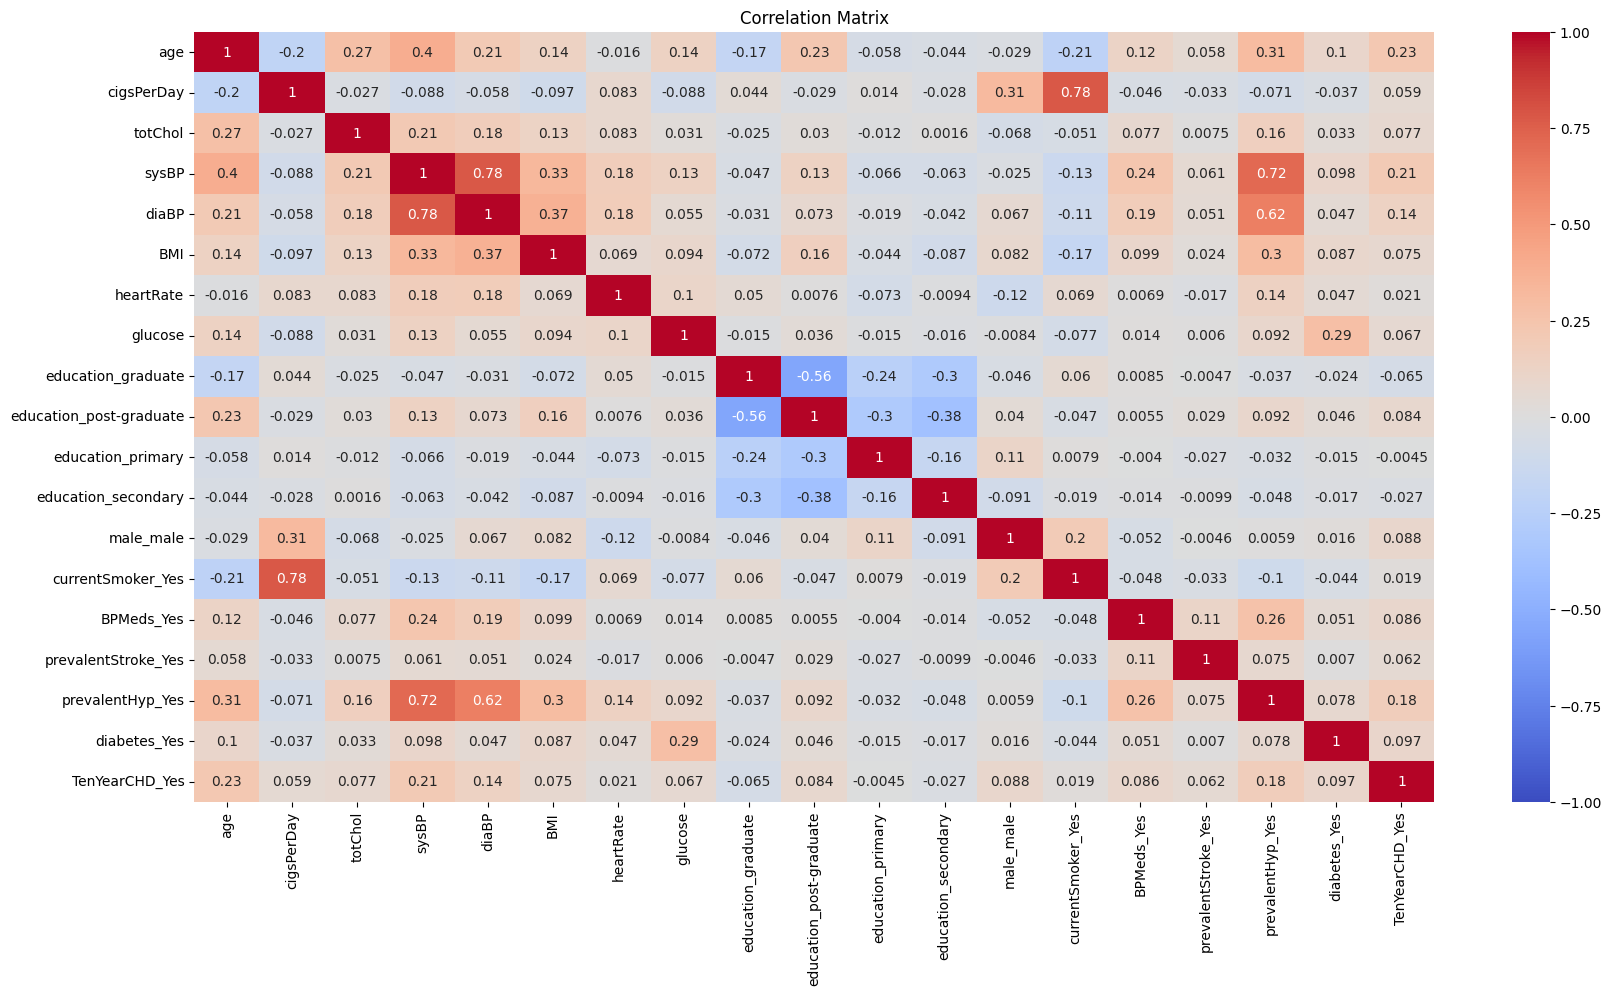

In [277]:
matrix=data_final.corr()
plt.figure(figsize=(20,10))
sns.heatmap(matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

Train Test Split

In [278]:
X=data_final.iloc[:,0:-1]
Y=data_final.iloc[:,18]
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)

In [279]:
X_train.shape

(2968, 18)

In [280]:
Y_train.shape

(2968,)

In [281]:
X_test.shape

(1272, 18)

In [282]:
Y_test.shape

(1272,)

In [283]:
X_train.head()

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,education_graduate,education_post-graduate,education_primary,education_secondary,male_male,currentSmoker_Yes,BPMeds_Yes,prevalentStroke_Yes,prevalentHyp_Yes,diabetes_Yes
3480,63.0,0.0,222.0,159.0,90.0,21.90,80.0,95.0,0,1,0,0,1,0,0,0,1,0
1809,55.0,0.0,195.0,135.0,80.0,32.91,100.0,75.0,0,0,0,1,0,0,0,0,0,0
1246,40.0,0.0,208.0,148.0,100.0,32.84,85.0,102.0,1,0,0,0,1,0,0,0,0,0
1921,52.0,0.0,223.0,132.0,82.0,26.06,75.0,63.0,0,1,0,0,0,0,0,0,0,0
3548,46.0,43.0,262.0,121.0,78.0,24.24,75.0,72.0,0,1,0,0,0,1,0,0,0,0


In [284]:
Y_train.head()

3480    1
1809    0
1246    0
1921    0
3548    0
Name: TenYearCHD_Yes, dtype: uint8

Logistic Regression

In [285]:
import statsmodels.api as sm
X = sm.add_constant(X)
model1=sm.Logit(Y_train,X_train).fit()

Optimization terminated successfully.
         Current function value: inf
         Iterations 7


/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2383: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2441: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


In [286]:
model1.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         TenYearCHD_Yes   No. Observations:                 2968
Model:                          Logit   Df Residuals:                     2950
Method:                           MLE   Df Model:                           17
Date:                Tue, 21 Nov 2023   Pseudo R-squ.:                     inf
Time:                        03:34:48   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
age                         0.0629      0.007      8.434      0.000       0.048       0.077
cigsPerDay                  0.0290      0.007      3.932      0.000       0.015       0.043
totChol                     0.0019      0.001      1.351      0.177      -0.001       0.005
sysBP                       0.0156      0.005      3.209      0.001       0.006       0.025
diaBP                      -0.0066      0.008     -0.839      0.401      -0.022       0.009
BMI                        -0.0091      0.014     -0.636      0.525      -0.037       0.019
heartRate                  -0.0008      0.005     -0.157      0.875      -0.010       0.009
glucose                     0.0051      0.005      1.101      0.271      -0.004       0.014
education_graduate         -7.6906      0.853     -9.018      0.000      -9.362      -6.019
education_post-graduate    -7.5815      0.859     -8.824      0.000      -9.266      -5.897
education_primary          -7.5234      0.856     -8.786      0.000      -9.202      -5.845
education_secondary        -7.6095      0.853     -8.917      0.000      -9.282      -5.937
male_male                   0.4856      0.121      4.020      0.000       0.249       0.722
currentSmoker_Yes          -0.2849      0.182     -1.561      0.119      -0.642       0.073
BPMeds_Yes                  0.2149      0.258      0.833      0.405      -0.291       0.721
prevalentStroke_Yes         0.6917      0.503      1.374      0.169      -0.295       1.678
prevalentHyp_Yes            0.2863      0.161      1.783      0.075      -0.028       0.601
diabetes_Yes                0.7825      0.271      2.885      0.004       0.251       1.314
===========================================================================================
"""

In [287]:
Y_pred=model1.predict(X_test,)
Y_pred_class = (Y_pred >= 0.7).astype(int)

In [288]:
Y_pred_class.head()

888     0
1064    0
1461    0
4139    0
1103    0
dtype: int64

In [289]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score
score =accuracy_score(Y_test,Y_pred_class)
print(score)

0.8482704402515723
